In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import os
import sys

# Add src to path
sys.path.append("src")
from BWImage import BWImage
from utils import get_gaussian_kernel
from utils import convolve


## Jupyter notebooks settings.

# Reload modules before executing each cell.
%load_ext autoreload
%autoreload 2 

# Print all print statements.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all" 

# Set white as color for pixels with no value.
BWImage.blank_value = 0

# Introduction

In this lab we blur an input image by applying a Gaussian kernel.

### Theory

I followed a slightly modified version from what was taught in class, which I describe below. 

Gaussian kernel is a matrix $M$ such that, $M = M / \sum_{i, j}M'_{i, j}$, where $M'_{x,y} = e^{-\frac{x^2 + y^2}{2\sigma}}$. 
The kernel has a dimension $k$, where $k = k'$ if $k'$ is odd and $k = k' + 1$ if k is even and $k' = \lceil{6\sigma + 1}\rceil$ Note that I have ignored the constants in the Gaussian function as we are normalizing the values.

Instead of using an $k \times k$ Gaussian kernel, I seperated the Gaussian kernels for computational efficiency. This possible because Gaussian kernel is a seperable kernel, i.e., $M = v^Tv$, where $v = v'/\sum_{i}v'_i$, and where $v' = e ^{-x^2/2\sigma}$. We can see that $M_{x, y} = v^T_xv_y$ and therefore $M = v^Tv$.

### Implementation.
**Input**: `data/input`

**Output**: `data/output`

**Source code**: `src`

* `BWImage.py`: Same from my previous labs. Implements a class with methods for basic image I/O.

* `utils.py`: Contains functions important to this lab. 
    - The `get_gaussian_kernel` function takes as input a $\sigma$ value and gives the $v$ described above. ``
    - The `convolve` function takes as input a image in BWImage format and $v$ and returns convolved image.


# Result

#### Read input image.

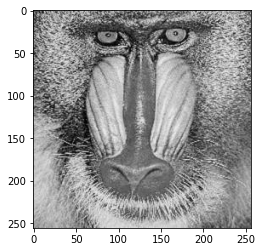

In [2]:
# Read input image.
img = cv.imread('data/input/Mandrill.png')
bwimg = BWImage(img)
plt.imshow(bwimg.get_image())

#### Blur the input image.

In [3]:
# Input sigma values
sigmas = [1.6, 1.2, 1.0, 0.6, 0.3, 0.0]
# Get Gaussian kernel components.
kernels = [get_gaussian_kernel(sigma) for sigma in sigmas]

# Get blurred images.
imgs_blurred = []
for kernel in kernels:
    imgs_blurred.append(convolve(bwimg, kernel).get_image())

100%|██████████| 256/256 [00:00<00:00, 1056.83it/s]


#### Dispay the blurred images.

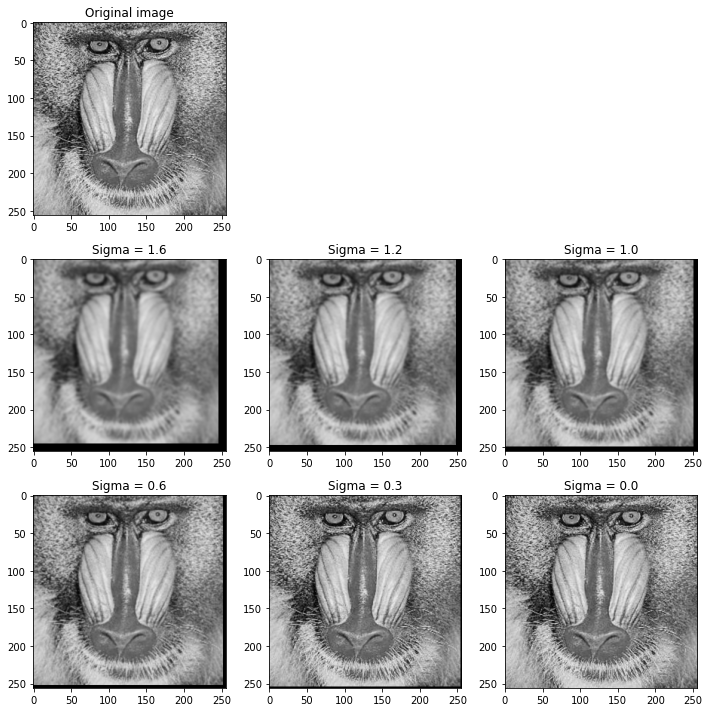

In [4]:
# Plot the original and the blurred images.
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original image')
ax[0, 1].axis('off');
ax[0, 2].axis('off');
for i in range(len(sigmas)):
    ax[i // 3 + 1, i % 3].imshow(imgs_blurred[i])
    ax[i // 3 + 1, i % 3].set_title("Sigma = " + str(sigmas[i]))
fig.tight_layout()
fig.savefig('data/output/Mandrils_blurred.png', facecolor='white')